In [22]:
from sklearn.datasets import load_iris
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from PCA import myPCA
from sklearn.decomposition import PCA as skPCA
from sklearn.datasets import load_digits

# ✅ First Task

In [23]:
iris=load_iris()

X,y =iris.data ,iris.target

print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


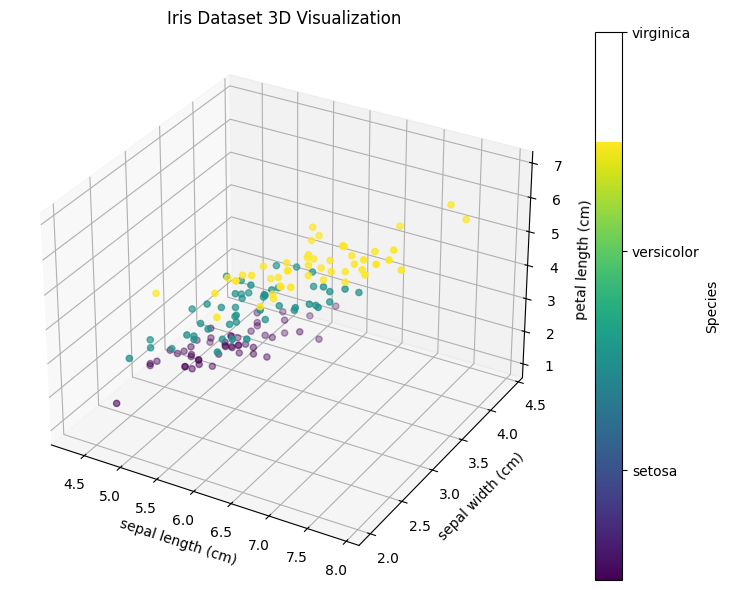

In [24]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="viridis")

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_title("Iris Dataset 3D Visualization")

legend = plt.colorbar(scatter)
legend.set_label("Species")
tick_positions = np.arange(len(iris.target_names)) + 0.5
legend.set_ticks(tick_positions)
legend.set_ticklabels(iris.target_names)

plt.tight_layout()
plt.show()

In [25]:
eigen_pca = myPCA(method="eigen")
svd_pca = myPCA(method="svd")
pca = skPCA(n_components=2)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

eigen_pca.fit(X_scaled)
svd_pca.fit(X_scaled)
pca.fit(X_scaled)

X_pca_eigen = eigen_pca.transform(X_scaled)
X_pca_svd = svd_pca.transform(X_scaled)
X_pca = pca.fit_transform(X_scaled)

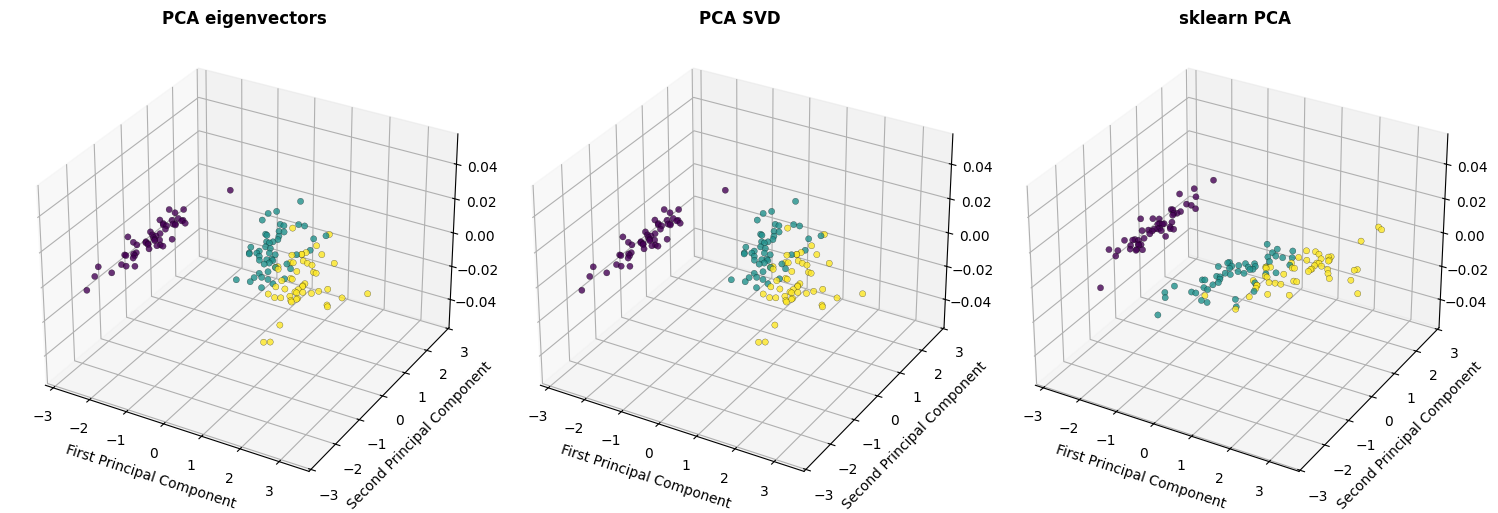

In [26]:
def visualize_pca_comparison(
    X_pca_eigen,
    X_pca_svd,
    X_pca_sklearn,
    y,
    figsize=(15, 5),
):

    titles = ["PCA eigenvectors", "PCA SVD", "sklearn PCA"]
    fig = plt.figure(figsize=figsize)
    pca_data = [X_pca_eigen, X_pca_svd, X_pca_sklearn]

    for i, (data, title) in enumerate(zip(pca_data, titles), 1):
        ax = fig.add_subplot(1, 3, i, projection="3d")
        scatter = ax.scatter(
            data[:, 0],
            data[:, 1],
            c=y,
            cmap="viridis",
            alpha=0.8,
            edgecolor="k",
            linewidth=0.2,
        )
        ax.set_title(title, fontsize=12, fontweight="bold")
        ax.set_xlabel("First Principal Component")
        ax.set_ylabel("Second Principal Component")
        ax.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()

    plt.show()

visualize_pca_comparison(X_pca_eigen, X_pca_eigen, X_pca, y)

## Key Findings
- **Eigenvector & SVD methods**: Produced identical results, confirming mathematical equivalence
- **Class separation**: All methods clearly separate Setosa class while showing partial overlap between Versicolor and Virginica
- **scikit-learn implementation**: Displays mirror effect of projection but maintains same separation patterns

## Dimensionality Reduction Impact
The reduction from 3D to 2D preserves the main data structure but lose some important information that might be present in the third principal component.



In [27]:
def plot_pca_explained_variance(X, max_components=None):

    pca = skPCA(n_components=max_components)
    pca.fit(X)

    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(variance_ratio)

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(
        range(1, len(variance_ratio) + 1),
        variance_ratio,
        "o-",
        color="#1f77b4",
        linewidth=2,
        markersize=8,
        label="Individual",
    )

    ax.plot(
        range(1, len(cumulative_variance) + 1),
        cumulative_variance,
        "s-",
        color="#ff7f0e",
        linewidth=2,
        markersize=8,
        label="Cumulative(nr of components>=2)",
    )

    ax.axhline(y=0.95, color="red", linestyle="--", alpha=0.7, label="95% Threshold")

    ax.set_title("PCA Explained Variance Ratio", fontsize=14, fontweight="bold")
    ax.set_xlabel("Number of Components", fontsize=12)
    ax.set_ylabel("Explained Variance Ratio", fontsize=12)
    ax.set_xticks(range(1, len(variance_ratio) + 1))
    ax.grid(True, linestyle="--", alpha=0.7)
    ax.legend()

    plt.tight_layout()
    return fig, variance_ratio


Explained variance ratio with 1 component: 0.9246


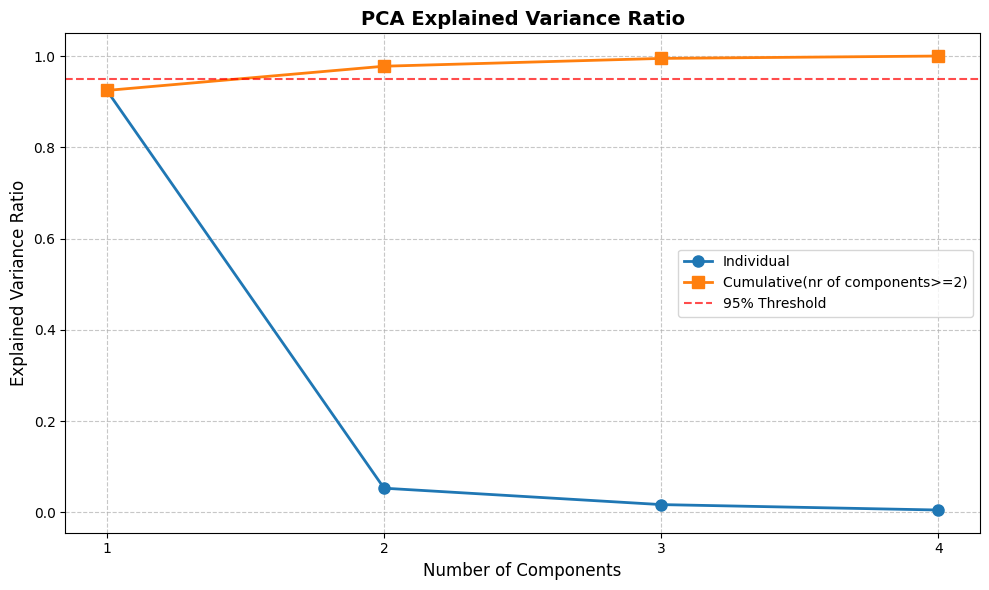


Conclusion:
The first component explains 92.46% of the total variance.
To explain >95% of variance, 2 components are needed.
One component captures most of the variance, suggesting a good dimensionality reduction.


In [28]:
pca_1 = skPCA(n_components=1)
pca_1.fit(X)
print(
    f"Explained variance ratio with 1 component: {pca_1.explained_variance_ratio_[0]:.4f}"
)

fig, variance_ratio = plot_pca_explained_variance(X)
plt.show()

print("\nConclusion:")
print(f"The first component explains {variance_ratio[0]:.2%} of the total variance.")
print(f"To explain >95% of variance, {np.argmax(np.cumsum(variance_ratio) >= 0.95) + 1} components are needed.")
print("One component captures most of the variance, suggesting a good dimensionality reduction.")

# ✅ Second Task

In [29]:
digits = load_digits()
X=digits.data
y=digits.target

random_indices=random.sample(range(len(X)),10)

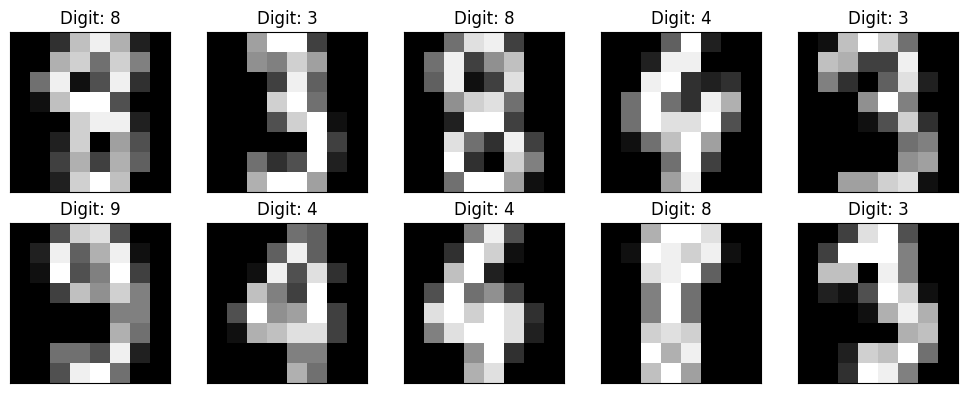

In [30]:
fig,axes=plt.subplots(2,5,figsize=(10,4))
axes=axes.flatten()

for i,idx in enumerate(random_indices):

  digit_data=X[idx].reshape(8,8)

  axes[i].imshow(digit_data, cmap='gray')
  axes[i].set_title(f'Digit: {y[idx]}')
  axes[i].set_xticks([])
  axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [31]:
pca=skPCA(n_components=2)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_pca=pca.fit_transform(X_scaled)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.2f}")

Explained variance ratio: [0.12033916 0.09561054]
Total explained variance: 0.22


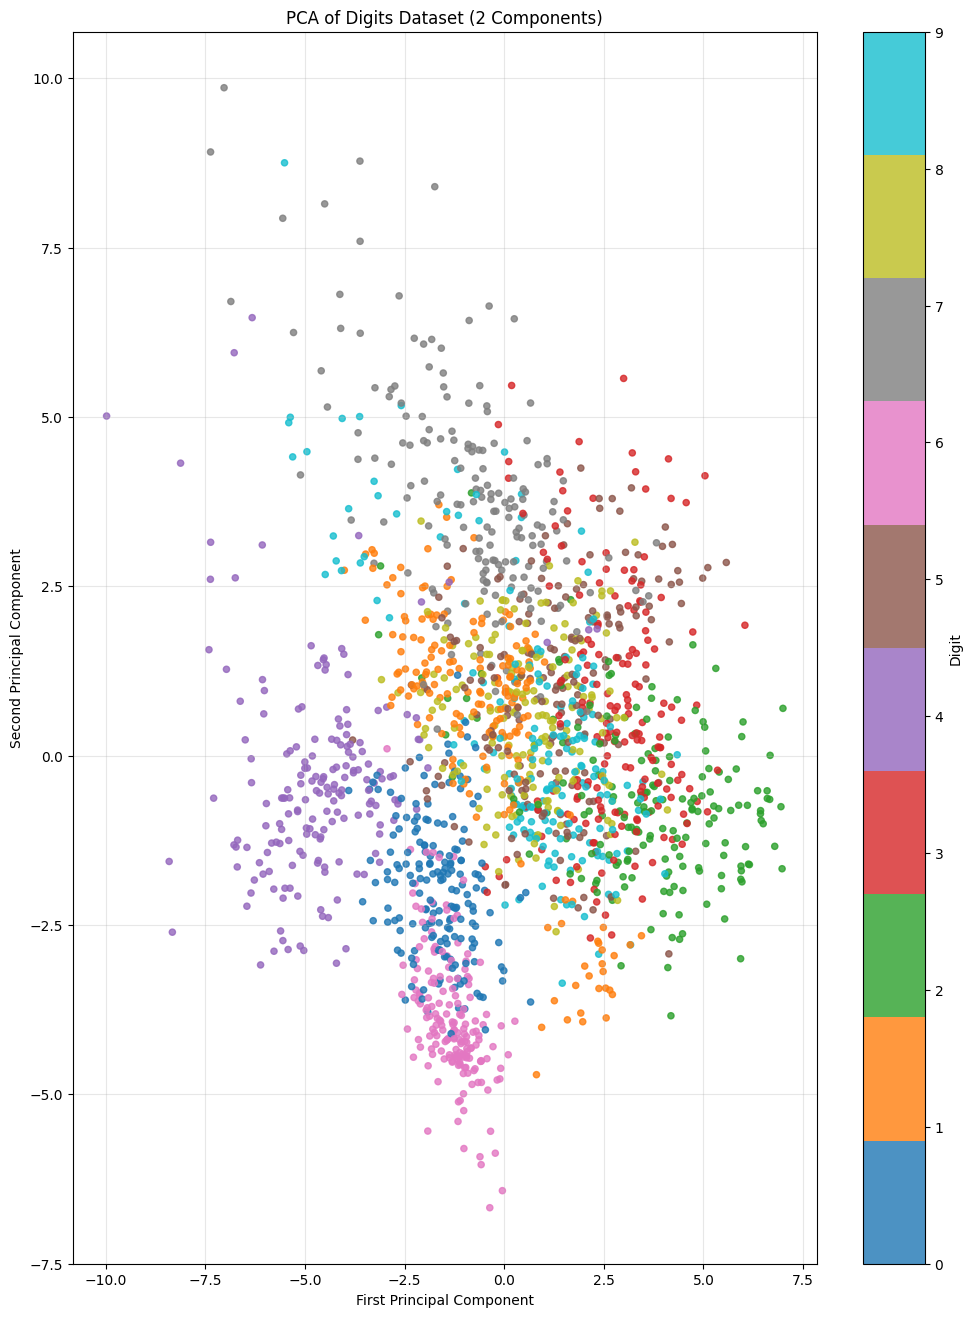

Original data shape: (1797, 64)
PCA-transformed data shape: (1797, 2)


In [32]:
plt.figure(figsize=(12, 16))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.8, s=20)
plt.colorbar(scatter, label='Digit')
plt.title('PCA of Digits Dataset (2 Components)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Original data shape: {X.shape}")
print(f"PCA-transformed data shape: {X_pca.shape}")

From this image I see that PCA is working ,and it can differ numbers using only 2 components but it is not so good

❗❗ Possible improvements use TSNE(t-Distributed Stochastic Neighbor Embedding) or UMAP (Uniform Manifold Approximation and Projection)
also using clustering is good option.